In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [3]:
def fetch_covid_data():
    url = "https://disease.sh/v3/covid-19/countries"
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print("Error fetching data:", e)
        return None

def process_data(data, country_name=None):
    if not data:
        return None
    
    df = pd.DataFrame(data)
    
    if country_name:
        country_data = df[df['country'].str.lower() == country_name.lower()]
        if country_data.empty:
            print(f"Country '{country_name}' not found.")
            return None
        return country_data.iloc[0]
    else:
        global_stats = {
            "Total Cases": df['cases'].sum(),
            "Total Deaths": df['deaths'].sum(),
            "Recovered": df['recovered'].sum(),
            "Active": df['active'].sum()
        }
        return global_stats

def display_global_stats(global_stats):
    print("\n🌍 Global COVID-19 Statistics:")
    for key, value in global_stats.items():
        print(f"{key}: {value:,}")

def display_country_stats(country_data):
    print(f"\n📍 COVID-19 Stats for {country_data['country']}:")
    print(f"Total Cases: {country_data['cases']:,}")
    print(f"Deaths: {country_data['deaths']:,}")
    print(f"Recovered: {country_data['recovered']:,}")
    print(f"Active: {country_data['active']:,}")
    print(f"Today's Cases: {country_data['todayCases']:,}")
    print(f"Today's Deaths: {country_data['todayDeaths']:,}")

def visualize_top_countries(data, metric='cases', top_n=10):
    df = pd.DataFrame(data)
    top_countries = df.sort_values(by=metric, ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='country', y=metric, data=top_countries, palette='Reds_r')
    plt.title(f"Top {top_n} Countries by {metric.capitalize()}")
    plt.xlabel("Country")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



🌍 Global COVID-19 Statistics:
Total Cases: 704,753,890
Total Deaths: 7,010,681
Recovered: 560,567,666
Active: 137,175,543



Enter a country name to see its COVID-19 stats (or press Enter to skip):  Nigeria



📍 COVID-19 Stats for Nigeria:
Total Cases: 267,188
Deaths: 3,155
Recovered: 259,953
Active: 4,080
Today's Cases: 0
Today's Deaths: 0


C:\Users\aqual\AppData\Local\Temp\ipykernel_11760\1940730718.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y=metric, data=top_countries, palette='Reds_r')


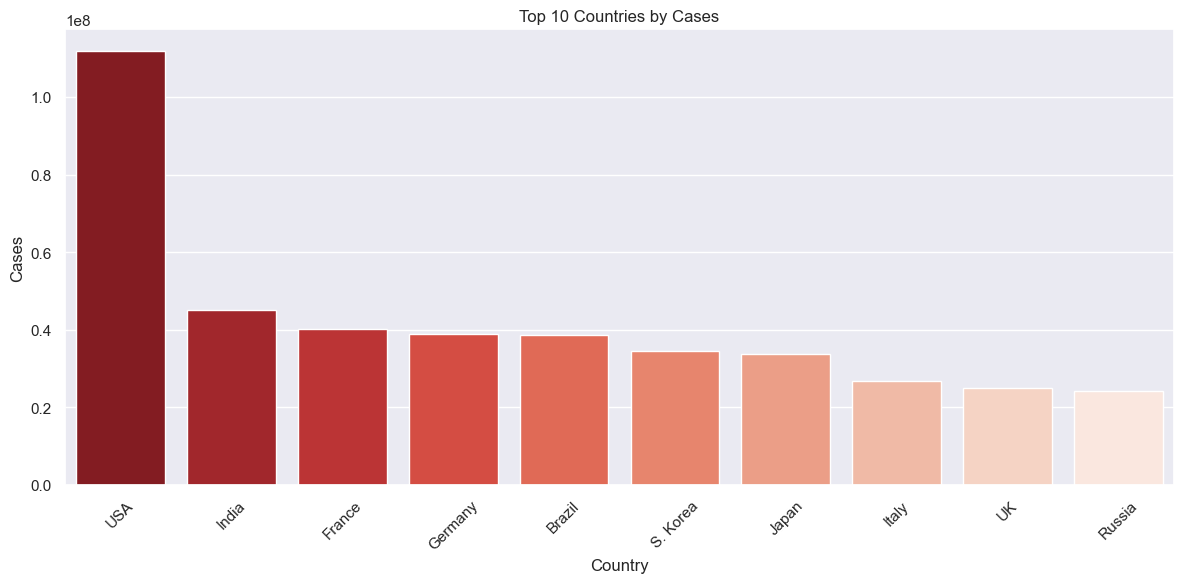

In [6]:
covid_data = fetch_covid_data()

global_stats = process_data(covid_data)
if global_stats:
    display_global_stats(global_stats)

country = input("\nEnter a country name to see its COVID-19 stats (or press Enter to skip): ").strip()
if country:
    country_stats = process_data(covid_data, country)
    if country_stats is not None:
        display_country_stats(country_stats)

visualize_top_countries(covid_data, metric='cases', top_n=10)